### Mark Hoogendoorn and Burkhardt Funk (2017)              
Machine Learning for the Quantified Self               
Springer,
Chapter 2    

In [7]:
from datetime import datetime
from util.VisualizeDataset import VisualizeDataset
from util.VisualizeDataset import VisualizeDataset
from util import util
import pandas as pd
import numpy as np
import copy
import os
import matplotlib.pyplot as plot
%matplotlib inline 

In [8]:
DataViz = VisualizeDataset()

In [9]:
# Read the result from the previous chapter, and make sure the index is of the type datetime.
dataset_path = 'intermediate_datafiles/'
try:
    dataset = pd.read_csv(dataset_path + 'all_data_converted.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

dataset.index = pd.to_datetime(dataset.index, format='%Y-%m-%d %H:%M:%S.%f'[:-3])

# Compute the number of milliseconds covered by an instane based on the first two rows
milliseconds_per_instance = (dataset.index[1] - dataset.index[0]).microseconds/1000

In [10]:
# creating sum of squares attributes from accelerometer and gyroscope data
acc_r = (dataset['acc_x']**2+dataset['acc_y']**2+dataset['acc_z']**2)
gyr_r = (dataset['gyr_x']**2+dataset['gyr_y']**2+dataset['gyr_z']**2)
dataset['acc_r'] = np.sqrt(acc_r)
dataset['gyr_r'] = np.sqrt(gyr_r)

In [11]:
#split the dataset into the seperate exercises
squat = dataset[(dataset.labelSquat == 1)]
bench = dataset[(dataset.labelBenchPress == 1)]
ohp = dataset[(dataset.labelOHP == 1)]
deadlift = dataset[(dataset.labelDeadlift == 1)]
row = dataset[(dataset.labelRow == 1)]

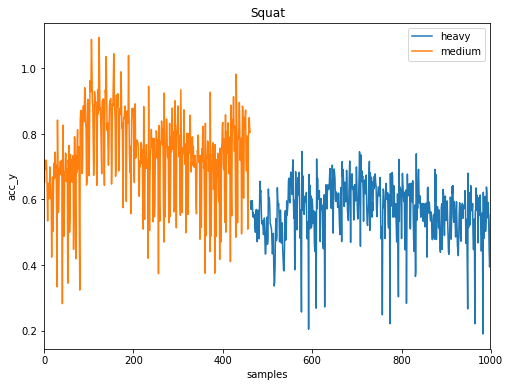

In [138]:
# Difference between heavy and medium weight squats
feature = 'acc_y'
exercise = 'Squat'
fig, ax = plot.subplots(figsize=(8,6))
squat[:1000].reset_index().groupby(['category'])[feature].plot(title=exercise, legend=True)
ax.set_ylabel(feature)
ax.set_xlabel('samples')
plot.show()

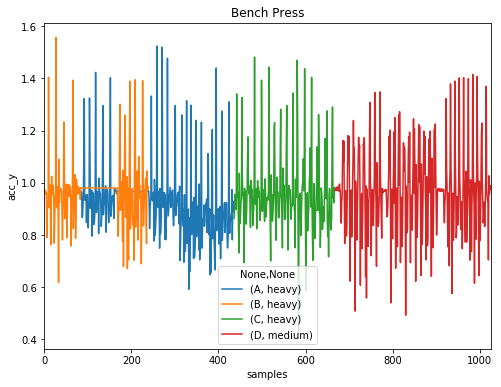

In [128]:
# Bench Press sets
feature = 'acc_y'
exercise = 'Bench Press'
fig, ax = plot.subplots(figsize=(8,6))
bench.reset_index().groupby(['participant', 'category'])[feature].plot(title=exercise, legend=True)
ax.set_xlabel('samples')
ax.set_ylabel(feature)
plot.show()

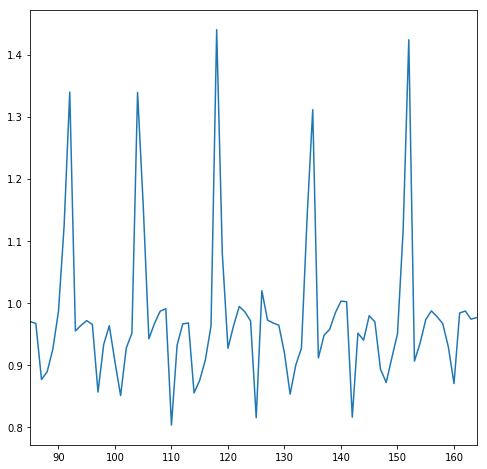

In [87]:
# Graph of a heavy bench press set (5 reps)
fig, ax = plot.subplots(figsize=(8,8))
bench.reset_index()['acc_r'][85:165].plot()
# ax.set_xlabel('samples')
# ax.set_ylabel('Acceleration')
plot.show()

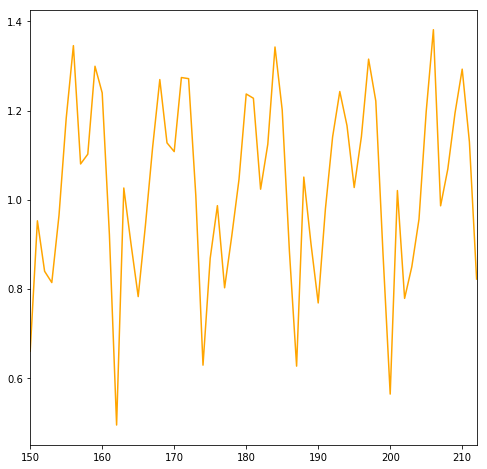

In [91]:
# Graph of a heavy deadlift set (5 reps)
fig, ax = plot.subplots(figsize=(8,8))
deadlift.reset_index()['acc_r'][150:213].plot(color='orange')
# ax.set_xlabel('samples')
# ax.set_ylabel('Acceleration')
plot.show()

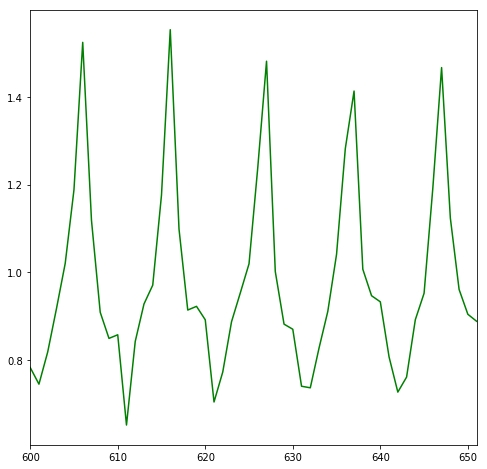

In [112]:
# Graph of a overhead press set (5 reps)
fig, ax = plot.subplots(figsize=(8,8))
ohp.reset_index()['acc_r'][600:652].plot(color='green')
# ax.set_xlabel('samples')
# ax.set_ylabel('Acceleration')
plot.show()

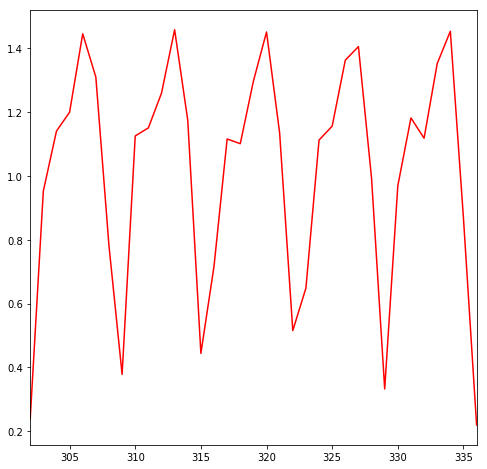

In [126]:
# Graph of a barbell row set (5 reps)
fig, ax = plot.subplots(figsize=(8,8))
row.reset_index()['acc_r'][302:337].plot(color='red')
# ax.set_xlabel('samples')
# ax.set_ylabel('Acceleration')
plot.show()

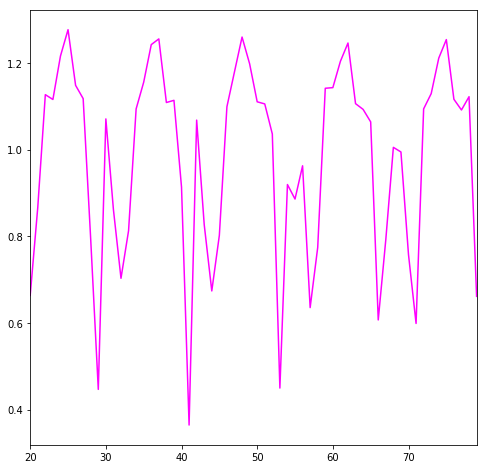

In [122]:
# Graph of a heavy squat set (5 reps)
fig, ax = plot.subplots(figsize=(8,8))
squat.reset_index()['acc_r'][20:80].plot(color='magenta')
# ax.set_xlabel('samples')
# ax.set_ylabel('Acceleration')
plot.show()

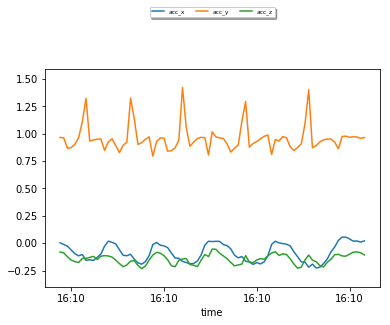

In [6]:
DataViz.plot_dataset(bench[bench.set == bench.set.unique()[1]], ['acc_'], ['like'], ['line'])

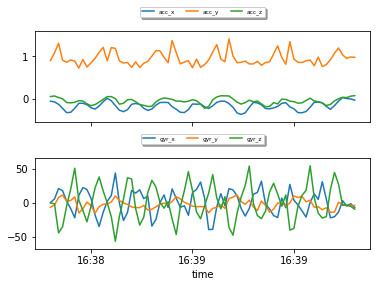

In [28]:
DataViz.plot_dataset(ohp[ohp.set == ohp.set.unique()[0]], ['acc_', 'gyr_'], ['like', 'like'], ['line', 'line'])

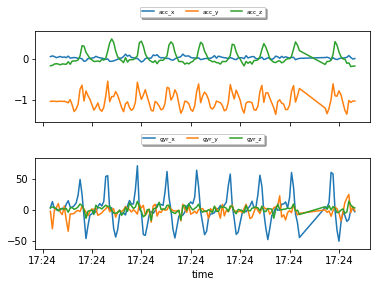

In [29]:
DataViz.plot_dataset(deadlift[deadlift.set == deadlift.set.unique()[0]], ['acc_', 'gyr_'], ['like', 'like'], ['line', 'line'])

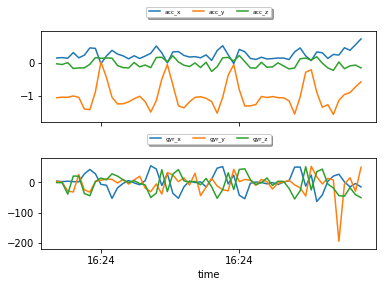

In [30]:
DataViz.plot_dataset(row[row.set == row.set.unique()[0]], ['acc_', 'gyr_'], ['like', 'like'], ['line', 'line'])

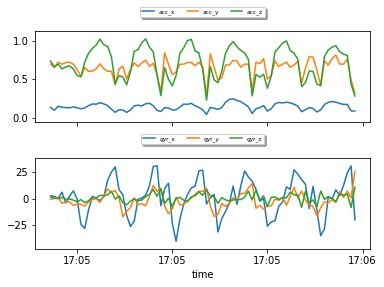

In [33]:
DataViz.plot_dataset(squat[squat.set == squat.set.unique()[0]], ['acc_', 'gyr_'], ['like', 'like'], ['line', 'line'])